In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler , StandardScaler , QuantileTransformer
import pickle
import warnings 
warnings.filterwarnings("ignore")

In [164]:
df=pd.read_csv("../data/mushrooms.csv")


In [165]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [167]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [168]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [169]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<Axes: xlabel='class', ylabel='count'>

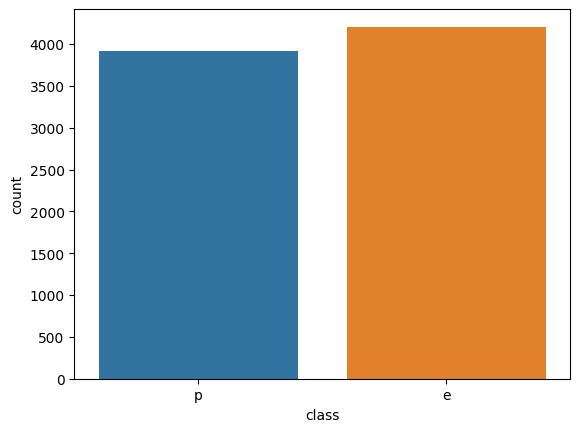

In [170]:
sns.countplot(df,x="class",hue="class")

In [171]:
le = LabelEncoder()
encoders = {}

def encode(df):
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype == 'category':
            le = LabelEncoder()  
            df[col] = le.fit_transform(df[col])
            encoders[col] = le  
    return df
df = encode(df)
with open('../models/encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

In [172]:
X=df.drop('class',axis=1)
y=df["class"]

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size=0.2, random_state=42)

0.9981538461538462
0.9961783439490446
1.0


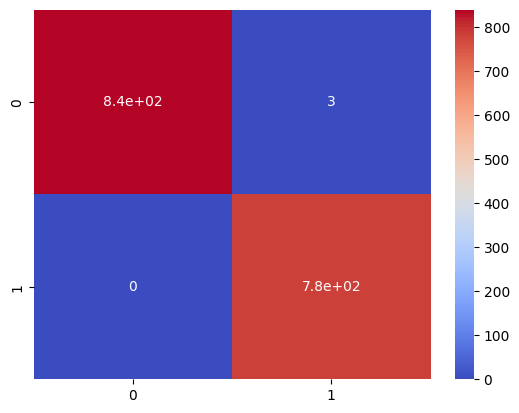

In [173]:
xgb_params = {
    "objective": "binary:logistic",  
    "learning_rate": 0.005,
    "subsample": 0.85,
    "colsample_bytree": 0.85,
    "alpha": 0.001,
    "lambda": 0.001,
    "gamma": 0.1,
    "min_child_weight": 5,
    "n_estimators": 350,
    "random_state": 42
}


xgb_model = xgb.XGBClassifier(**xgb_params)


xgb_model.fit(X_Train, Y_Train)

Y_pred = xgb_model.predict(X_Test)

accuracy = accuracy_score(Y_Test, Y_pred)
precision = precision_score(Y_Test, Y_pred, average='binary')  
recall = recall_score(Y_Test, Y_pred, average='binary')  
cm = confusion_matrix(Y_Test, Y_pred)

print(accuracy)
print(precision)
print(recall)

sns.heatmap(data=cm,cmap="coolwarm",annot=True)
plt.show()

In [174]:

with open("../models/model.pkl",'wb') as model_file:
    pickle.dump(xgb_model,model_file)
